In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from avulsion_bmi import BmiRiverModule

In [3]:
np.random.seed(1945)
avulsion = BmiRiverModule()
avulsion.initialize('input.yaml')

In [4]:
avulsion.get_time_step(), avulsion.get_time_units()

(73, 'd')

In [5]:
n_steps = int(1000. * 365 / avulsion.get_time_step())

In [6]:
x, y = [], []
for i in xrange(n_steps):
    avulsion.update()
    if i % 100 == 0:
        x.append(avulsion.get_value('channel_centerline__x_coordinate'))
        y.append(avulsion.get_value('channel_centerline__y_coordinate'))

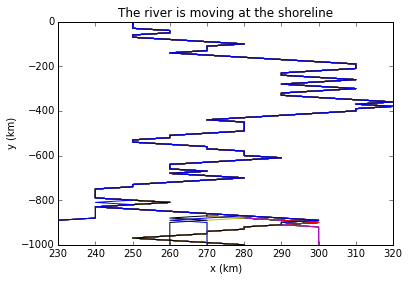

In [7]:
for river_x, river_y in zip(x, y):
    plt.plot(np.array(river_y) / 1000., - np.array(river_x) / 1000.)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('The river is moving at the shoreline')

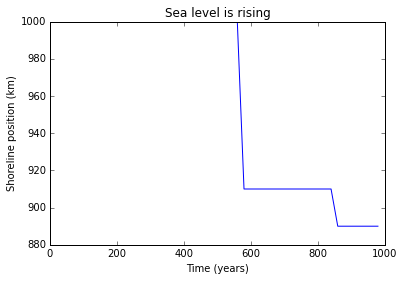

In [8]:
river_mouth = [river_x[-1] / 1000. for river_x in x]
time = np.arange(len(river_mouth)) * avulsion.get_time_step() * 100 / 365
plt.plot(time, river_mouth)
plt.xlabel('Time (years)')
plt.ylabel('Shoreline position (km)')
plt.title('Sea level is rising')